In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
import imblearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score


In [4]:
#importing the dataset which is in csv file
data= pd.read_csv('/content/train_u6lujuX_CVtuZ9i.csv')
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
#changing the datype of each float column to int
data['Gender']=data['Gender'].astype('int64')
data['Married']=data['Married'].astype('int64')
data['Department']=data['Department'].astype('int64')
data['Self_Employed']=data['Self_Employed'].astype('int64')
data['CoapplicantIncome']=data['CoapplicantIncome'].astype('int64')
data['LoanAmount']=data['LoanAmount'].astype('int64')
data['loan_Amount_Term']=data['Loan_Amount_Term'].astype('int64')
data['Credit_History']=data['Credit_History'].astype('int64')

ValueError: ignored

In [6]:
#Balancing the dataset by using smote
from imblearn.combine import SMOTETomek
smote = SMOTETomek(0.90)
y = data['Loan_Status']
x = data.drop(columns=['Loan_Status'],axis=1)
x_bal,y_bal = smote.fit_resample(x,y)
print(y.value_counts())
print(y_bal.value_counts())

TypeError: ignored

In [8]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


<ipython-input-7-16627535cfe8>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['ApplicantIncome'], color='r')
<ipython-input-7-16627535cfe8>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Credit_History'])


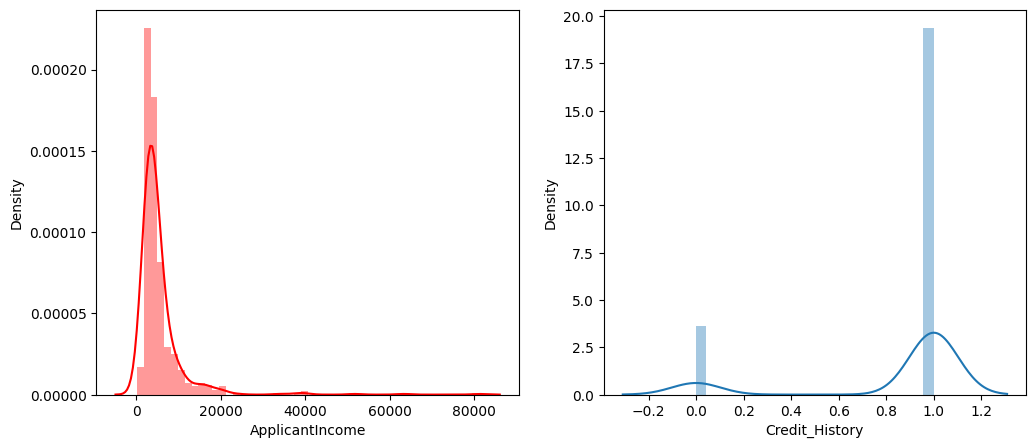

In [7]:
#plotting the using distplot
plt.figure(figsize = (12,5))
plt.subplot(121)
sns.distplot(data['ApplicantIncome'], color='r')
plt.subplot(122)
sns.distplot(data['Credit_History'])
plt.show() 


ValueError: ignored

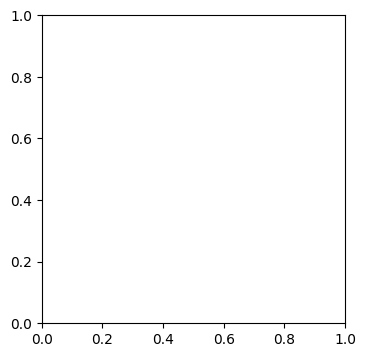

In [11]:
plt.figure(figsize=(18,4))
plt.subplot(1,4,1)
sns.countplot(data['Gender'])
plt.subplot(1,4,2)
sns.countplot(data['Education'])
plt.show()

ValueError: ignored

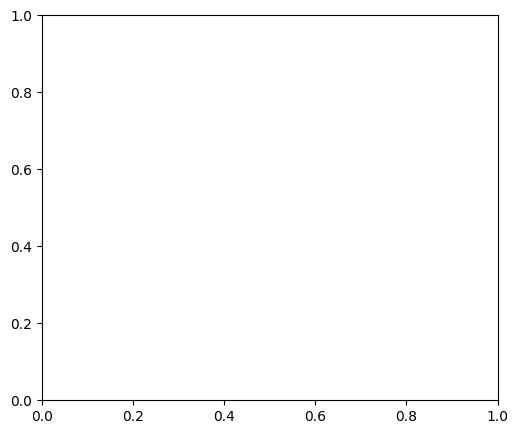

In [13]:
plt.figure(figsize=(20,5))
plt.subplot(131)
sns.countplot(data['Married'], hue=data['Gender'])
plt.subplot(132)
sns.countplot(data['Self_Employed'],hue=data['Education'])
plt.subplot(133)
sns.countplot(data['Property_Area'], hue=data['Loan_Amount_term'])

In [14]:
sns.swarmplot(data['Gender'],data['ApplicantIncome'], hue=data['Loan_Status'])

TypeError: ignored

In [16]:
sc=StandardScaler()
x_bal=sc.fit_transform(x_bal)
x_bal = pd.DataFrame(x_bal,columns=names)

NameError: ignored

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x_bal, y_bal, teat_size=0.33, random_state=42)

NameError: ignored

In [18]:
def decisionTree(x_train, x_test, y_train, y_test)
    dt=DecisionTreeClassifier()
    dt.fit(x_train,y_train)
    yPred = dt.predict(x_test)
    print('***DecisionTreeClassifier***')
    print('Confusion matrix')
    print(confusion_matrix(y_test,yPred))
    print('Classification report')
    print(classification_report(y-test,yPred))

SyntaxError: ignored

In [19]:
def randomForest(x_train, x_test, y_train,y_test):
    rf = RandomForestClassifier()
    rf.fit(x_train,y_train)
    yPred = rf.predict(x_test)
    print('***RandomForestClassifier***')
    print('Confusion matrix')
    print(confusion_matrix(y_test,yPred))
    print('Classification report')
    print(classification report(y_test,yPred))

SyntaxError: ignored

In [20]:
def KNN(x_train,x_test,y_train,y_test):
    knn = KNeighborsClassifier()
    knn.fit(x_train,y_train)
    yPred= knn.predict(x_test)
    print('***KNeighborsClassifier***')
    print('confusion matrix')
    print(confusion_matrix(y_test,yPred))
    print('Classification report')
    print(classification_report(y_test,yPred))

In [23]:
def xgboost(x_train, x_tesst, y_train, y_test):
  xg=GradientBoostingClassifier()
  xg.fit(x_train,y_train)
  yPred= xg.predict(x_test)
  print('***GradientBoostingClassifier***')
  print('confusion matrix')
  print(confusion_matrix(y_test,yPred))
  print('Classification report')
  print(classification_report(y_test,yPred))

In [22]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

classifier=Seq

NameError: ignored

In [24]:
def compareModel(x_train,x_test,y_train,y_test):
  decisionTree(x_train,x_test,y_train,y_test)
  print('_'*100)
  RandomForest(x_train,x_test,y_train,y_test)
  print('_'*100)
  XGB(x_train,x_test,y_train,y_test)
  print('_'*100)
  KNN(x_train,x_test,y_train,y_test)
  print('_'*100)

In [27]:
compareModel(x_train,x_test,y_train,y_test)

NameError: ignored

In [31]:
yPred = classifier.predict(x_test)
print(accuracy_score(y_pred,y_test))
print("ANN Model")
print("Confusion_Matrix")
print(confusion_matrix(y_test,y_pred))
print("Classification Report")
print(classification_report(y_test,y_pred))

NameError: ignored

In [33]:
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier()
rf.fit(x_train,y_train)
yPred = rf.predict(x_test)

f1_score(yPred,y_test,average='weighted')

cv = cross_val_score(rf,x,y,cv=5)

np.mean(cv)

NameError: ignored